This task tries to apply CNN on "cifar100" data and get the highest accuracy in validation sets by tuning the model.

*Model achieved **97.40%** accuracy in validation data*


In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar100
  
import numpy as np
import matplotlib.pyplot as plt
  
import warnings
warnings.filterwarnings('ignore')

In [4]:
%%timeit
#load the data cifar100 and Distribute it to train and test set
(X_train,Y_train), (X_test,Y_test)=cifar100.load_data()
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


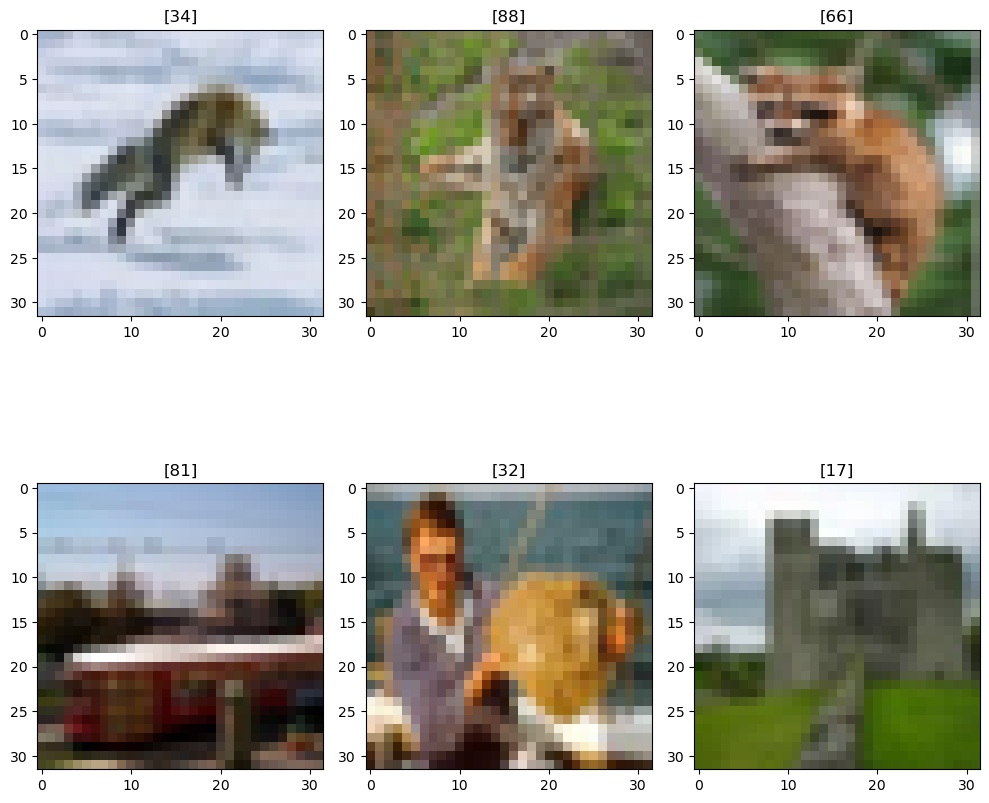

In [6]:
def show_samples(data, labels):
    plt.subplots(figsize=(10, 10))
    for i in range(6):
        plt.subplot(2,3,i+1)
        k=np.random.randint(0, data.shape[0])
        plt.title(labels[k])
        plt.imshow(data[k])
    plt.tight_layout()
    plt.show()
  
show_samples(X_train, Y_train)

In [4]:
#Normalize pixel values
X_train=X_train.astype("float32") / 255.0
X_test=X_test.astype("float32") / 255.0
X_test

array([[[[0.78039217, 0.84313726, 0.9764706 ],
         [0.76862746, 0.827451  , 0.95686275],
         [0.7647059 , 0.8235294 , 0.9529412 ],
         ...,
         [0.84705883, 0.90588236, 0.98039216],
         [0.8509804 , 0.90588236, 0.98039216],
         [0.8784314 , 0.91764706, 0.9882353 ]],

        [[0.77254903, 0.8235294 , 0.9372549 ],
         [0.7647059 , 0.8156863 , 0.93333334],
         [0.7647059 , 0.8235294 , 0.9411765 ],
         ...,
         [0.90588236, 0.9529412 , 0.98039216],
         [0.9137255 , 0.9529412 , 0.98039216],
         [0.94509804, 0.9607843 , 0.99215686]],

        [[0.87058824, 0.8862745 , 0.9647059 ],
         [0.8352941 , 0.8627451 , 0.9490196 ],
         [0.81960785, 0.85882354, 0.9529412 ],
         ...,
         [0.9529412 , 0.98039216, 0.9843137 ],
         [0.95686275, 0.9764706 , 0.9843137 ],
         [0.98039216, 0.98039216, 0.99215686]],

        ...,

        [[0.28235295, 0.28627452, 0.3882353 ],
         [0.2784314 , 0.2901961 , 0.4       ]

In [5]:
#Convert class vectors to one-hot encoding
num_classes=100 #since cifar100 has 100 class data
Y_train =keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

In [7]:
# Define the CNN model
model = keras.Sequential(
    [
        layers.Conv2D(32,(3,3), activation="relu", padding="same", input_shape=(32, 32, 3)),
        layers.Conv2D(64,(3,3), activation="relu", padding="same"),
        layers.Conv2D(128,(3,3), activation="relu", padding="same"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(128,(3,3), activation="relu", padding="same"),
        layers.Dropout(0.25),
        layers.Flatten(),
        layers.Dense(256, activation="relu"),
        layers.BatchNormalization(),
        layers.Dense(256, activation="relu"),
        layers.Dropout(0.3),
        layers.BatchNormalization(),
        layers.Dense(100, activation="softmax"),
    ]
)

In [23]:
# Compile the model
model.compile(loss="categorical_crossentropy", 
              optimizer="adamax", 
              metrics=["accuracy"])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 128)       0         
 D)                                                              
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       147584    
                                                                 
 dropout (Dropout)           (None, 16, 16, 128)       0         
                                                        

In [26]:
#Train the model
batch_size=64
epochs=10
model_hist=model.fit(X_train,Y_train, batch_size=batch_size, 
                     epochs=epochs, 
                     validation_data=(X_test,Y_test))

Epoch 1/10
782/782 [==============================] - 273s 349ms/step - loss: 1.3091 - accuracy: 0.6374 - val_loss: 1.8003 - val_accuracy: 0.5152
Epoch 2/10
782/782 [==============================] - 327s 418ms/step - loss: 1.1719 - accuracy: 0.6702 - val_loss: 1.4892 - val_accuracy: 0.5866
Epoch 3/10
782/782 [==============================] - 305s 390ms/step - loss: 1.0394 - accuracy: 0.7043 - val_loss: 1.1934 - val_accuracy: 0.6694
Epoch 4/10
782/782 [==============================] - 294s 377ms/step - loss: 0.9289 - accuracy: 0.7312 - val_loss: 0.9875 - val_accuracy: 0.7282
Epoch 5/10
782/782 [==============================] - 296s 378ms/step - loss: 0.8130 - accuracy: 0.7622 - val_loss: 0.7469 - val_accuracy: 0.8012
Epoch 6/10
782/782 [==============================] - 299s 382ms/step - loss: 0.7167 - accuracy: 0.7886 - val_loss: 0.5560 - val_accuracy: 0.8520
Epoch 7/10
782/782 [==============================] - 293s 375ms/step - loss: 0.6218 - accuracy: 0.8174 - val_loss: 0.4085 -

----------------------------------------------------------------------------------------------------------------------------------
*The model is able to achieve **97.40** accurancy in the validation data (X_test, Y_test).*.

-----------------------------------------------------------------------------------------------------------------------------------

##### I tried to make predictions on the validation set. 

In [27]:
#Imaking predictions on the validation set
Y_pred=model.predict(X_test)

313/313 [==============================] - 13s 40ms/step


In [28]:
# Convert predictions and Y_test to class labels
Y_true=[np.argmax(i) for i in Y_test]
Y_pred_labels=[np.argmax(i) for i in Y_pred]
Y_pred_labels[:4]

[68, 80, 55, 11]

In [33]:
cm=tf.math.confusion_matrix(labels=Y_true, predictions=Y_pred_labels)
print(cm)

from sklearn.metrics import classification_report
cr=classification_report(Y_true,Y_pred_labels)
print(cr)

tf.Tensor(
[[78  1  1 ...  0  0  0]
 [ 1 55  0 ...  0  0  0]
 [ 1  1 28 ...  2  9  0]
 ...
 [ 0  0  0 ... 42  1  1]
 [ 0  0  5 ...  1 23  0]
 [ 0  0  0 ...  1  1 45]], shape=(100, 100), dtype=int32)
              precision    recall  f1-score   support

           0       0.72      0.78      0.75       100
           1       0.59      0.55      0.57       100
           2       0.29      0.28      0.29       100
           3       0.24      0.25      0.25       100
           4       0.31      0.31      0.31       100
           5       0.43      0.39      0.41       100
           6       0.51      0.48      0.49       100
           7       0.45      0.44      0.44       100
           8       0.72      0.51      0.60       100
           9       0.51      0.61      0.56       100
          10       0.41      0.32      0.36       100
          11       0.35      0.25      0.29       100
          12       0.34      0.39      0.36       100
          13       0.44      0.46      0.45 

*The prediction was able to achieve only 45% accuracy.*

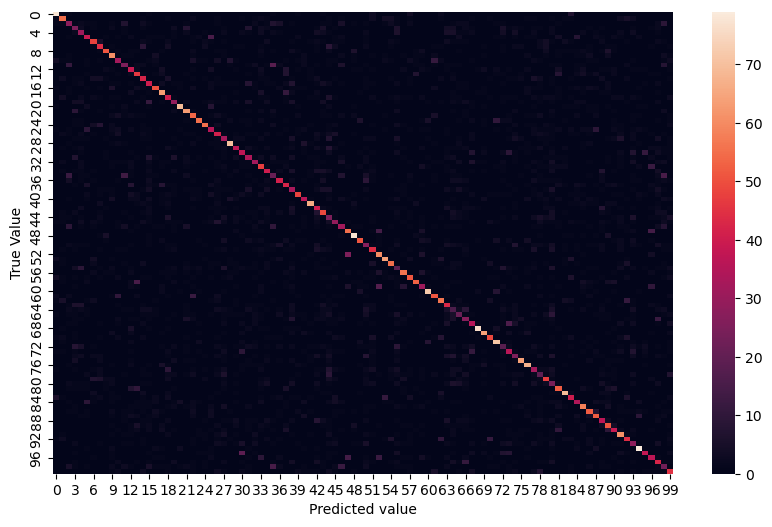

In [38]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(cm)
plt.xlabel("Predicted value")
plt.ylabel("True Value")
plt.show()